In [ ]:
!pip install xgboost # xgboost

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.multioutput import MultiOutputClassifier
import xgboost as xgb

In [2]:
# database louding
training_df = pd.read_csv('./Training_set_Cleaning.csv')

In [3]:
# Feature identify and target variables
xcols = ['respondent_id','h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds', 'behavioral_avoidance', 'behavioral_face_mask',
                     'behavioral_wash_hands','behavioral_large_gatherings','behavioral_outside_home','behavioral_touch_face','doctor_recc_h1n1',
                     'doctor_recc_seasonal','chronic_med_condition','child_under_6_months','health_worker','health_insurance','opinion_h1n1_vacc_effective','opinion_h1n1_risk',
                     'opinion_h1n1_sick_from_vacc','opinion_seas_vacc_effective','opinion_seas_risk','opinion_seas_sick_from_vacc','age_group',
                     'education','race','sex','income_poverty','marital_status','rent_or_own','employment_status','hhs_geo_region',
                     'census_msa','household_adults','household_children','employment_industry','employment_occupation'
                     ]
ycol = ['h1n1_vaccine', 'seasonal_vaccine']

x = training_df[xcols].select_dtypes(include=["float64", "int64"])
y = training_df[ycol]


In [4]:
# Seperate database
X_train, X_eval, y_train, y_eval = train_test_split(
    x,
    y,
    test_size = 0.3,
    random_state = 12346 
)

# Identify XGBoost Model
xgb_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss')

In [5]:
# 定义参数网格 
param_grid = {
    'estimator__n_estimators': [100, 200, 300],
    'estimator__learning_rate': [0.01, 0.05, 0.1],
    'estimator__max_depth': [3, 4, 5],
    'estimator__subsample': [0.7, 0.8, 0.9],
    'estimator__colsample_bytree': [0.7, 0.8, 0.9],
}

In [6]:
# Create MultiOutputClassifier real case
multioutput_estimator = MultiOutputClassifier(estimator=xgb_model)

# Create GridSearchCV real case
grid_search = GridSearchCV(estimator=multioutput_estimator, param_grid=param_grid, cv=3, scoring='accuracy', verbose=2)

# Model Training
grid_search.fit(X_train, y_train)

# Print most optimizated coefficiency and score.
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")

Fitting 3 folds for each of 243 candidates, totalling 729 fits
[CV] END estimator__colsample_bytree=0.7, estimator__learning_rate=0.01, estimator__max_depth=3, estimator__n_estimators=100, estimator__subsample=0.7; total time=   0.4s
[CV] END estimator__colsample_bytree=0.7, estimator__learning_rate=0.01, estimator__max_depth=3, estimator__n_estimators=100, estimator__subsample=0.7; total time=   0.2s
[CV] END estimator__colsample_bytree=0.7, estimator__learning_rate=0.01, estimator__max_depth=3, estimator__n_estimators=100, estimator__subsample=0.7; total time=   0.3s
[CV] END estimator__colsample_bytree=0.7, estimator__learning_rate=0.01, estimator__max_depth=3, estimator__n_estimators=100, estimator__subsample=0.8; total time=   0.2s
[CV] END estimator__colsample_bytree=0.7, estimator__learning_rate=0.01, estimator__max_depth=3, estimator__n_estimators=100, estimator__subsample=0.8; total time=   0.3s
[CV] END estimator__colsample_bytree=0.7, estimator__learning_rate=0.01, estimator

[CV] END estimator__colsample_bytree=0.7, estimator__learning_rate=0.01, estimator__max_depth=4, estimator__n_estimators=300, estimator__subsample=0.8; total time=   1.0s
[CV] END estimator__colsample_bytree=0.7, estimator__learning_rate=0.01, estimator__max_depth=4, estimator__n_estimators=300, estimator__subsample=0.8; total time=   1.0s
[CV] END estimator__colsample_bytree=0.7, estimator__learning_rate=0.01, estimator__max_depth=4, estimator__n_estimators=300, estimator__subsample=0.8; total time=   1.0s
[CV] END estimator__colsample_bytree=0.7, estimator__learning_rate=0.01, estimator__max_depth=4, estimator__n_estimators=300, estimator__subsample=0.9; total time=   1.0s
[CV] END estimator__colsample_bytree=0.7, estimator__learning_rate=0.01, estimator__max_depth=4, estimator__n_estimators=300, estimator__subsample=0.9; total time=   1.0s
[CV] END estimator__colsample_bytree=0.7, estimator__learning_rate=0.01, estimator__max_depth=4, estimator__n_estimators=300, estimator__subsampl

[CV] END estimator__colsample_bytree=0.7, estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=200, estimator__subsample=0.9; total time=   0.5s
[CV] END estimator__colsample_bytree=0.7, estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=200, estimator__subsample=0.9; total time=   0.5s
[CV] END estimator__colsample_bytree=0.7, estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=200, estimator__subsample=0.9; total time=   0.5s
[CV] END estimator__colsample_bytree=0.7, estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=300, estimator__subsample=0.7; total time=   0.8s
[CV] END estimator__colsample_bytree=0.7, estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=300, estimator__subsample=0.7; total time=   0.8s
[CV] END estimator__colsample_bytree=0.7, estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=300, estimator__subsampl

[CV] END estimator__colsample_bytree=0.7, estimator__learning_rate=0.05, estimator__max_depth=5, estimator__n_estimators=200, estimator__subsample=0.7; total time=   0.8s
[CV] END estimator__colsample_bytree=0.7, estimator__learning_rate=0.05, estimator__max_depth=5, estimator__n_estimators=200, estimator__subsample=0.7; total time=   0.8s
[CV] END estimator__colsample_bytree=0.7, estimator__learning_rate=0.05, estimator__max_depth=5, estimator__n_estimators=200, estimator__subsample=0.7; total time=   0.8s
[CV] END estimator__colsample_bytree=0.7, estimator__learning_rate=0.05, estimator__max_depth=5, estimator__n_estimators=200, estimator__subsample=0.8; total time=   0.8s
[CV] END estimator__colsample_bytree=0.7, estimator__learning_rate=0.05, estimator__max_depth=5, estimator__n_estimators=200, estimator__subsample=0.8; total time=   0.8s
[CV] END estimator__colsample_bytree=0.7, estimator__learning_rate=0.05, estimator__max_depth=5, estimator__n_estimators=200, estimator__subsampl

[CV] END estimator__colsample_bytree=0.7, estimator__learning_rate=0.1, estimator__max_depth=4, estimator__n_estimators=100, estimator__subsample=0.8; total time=   0.3s
[CV] END estimator__colsample_bytree=0.7, estimator__learning_rate=0.1, estimator__max_depth=4, estimator__n_estimators=100, estimator__subsample=0.8; total time=   0.3s
[CV] END estimator__colsample_bytree=0.7, estimator__learning_rate=0.1, estimator__max_depth=4, estimator__n_estimators=100, estimator__subsample=0.9; total time=   0.3s
[CV] END estimator__colsample_bytree=0.7, estimator__learning_rate=0.1, estimator__max_depth=4, estimator__n_estimators=100, estimator__subsample=0.9; total time=   0.3s
[CV] END estimator__colsample_bytree=0.7, estimator__learning_rate=0.1, estimator__max_depth=4, estimator__n_estimators=100, estimator__subsample=0.9; total time=   0.3s
[CV] END estimator__colsample_bytree=0.7, estimator__learning_rate=0.1, estimator__max_depth=4, estimator__n_estimators=200, estimator__subsample=0.7;

[CV] END estimator__colsample_bytree=0.7, estimator__learning_rate=0.1, estimator__max_depth=5, estimator__n_estimators=300, estimator__subsample=0.9; total time=   1.1s
[CV] END estimator__colsample_bytree=0.8, estimator__learning_rate=0.01, estimator__max_depth=3, estimator__n_estimators=100, estimator__subsample=0.7; total time=   0.3s
[CV] END estimator__colsample_bytree=0.8, estimator__learning_rate=0.01, estimator__max_depth=3, estimator__n_estimators=100, estimator__subsample=0.7; total time=   0.3s
[CV] END estimator__colsample_bytree=0.8, estimator__learning_rate=0.01, estimator__max_depth=3, estimator__n_estimators=100, estimator__subsample=0.7; total time=   0.3s
[CV] END estimator__colsample_bytree=0.8, estimator__learning_rate=0.01, estimator__max_depth=3, estimator__n_estimators=100, estimator__subsample=0.8; total time=   0.3s
[CV] END estimator__colsample_bytree=0.8, estimator__learning_rate=0.01, estimator__max_depth=3, estimator__n_estimators=100, estimator__subsample

[CV] END estimator__colsample_bytree=0.8, estimator__learning_rate=0.01, estimator__max_depth=4, estimator__n_estimators=300, estimator__subsample=0.7; total time=   1.0s
[CV] END estimator__colsample_bytree=0.8, estimator__learning_rate=0.01, estimator__max_depth=4, estimator__n_estimators=300, estimator__subsample=0.8; total time=   1.0s
[CV] END estimator__colsample_bytree=0.8, estimator__learning_rate=0.01, estimator__max_depth=4, estimator__n_estimators=300, estimator__subsample=0.8; total time=   1.0s
[CV] END estimator__colsample_bytree=0.8, estimator__learning_rate=0.01, estimator__max_depth=4, estimator__n_estimators=300, estimator__subsample=0.8; total time=   1.0s
[CV] END estimator__colsample_bytree=0.8, estimator__learning_rate=0.01, estimator__max_depth=4, estimator__n_estimators=300, estimator__subsample=0.9; total time=   1.0s
[CV] END estimator__colsample_bytree=0.8, estimator__learning_rate=0.01, estimator__max_depth=4, estimator__n_estimators=300, estimator__subsampl

[CV] END estimator__colsample_bytree=0.8, estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=200, estimator__subsample=0.8; total time=   0.5s
[CV] END estimator__colsample_bytree=0.8, estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=200, estimator__subsample=0.9; total time=   0.6s
[CV] END estimator__colsample_bytree=0.8, estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=200, estimator__subsample=0.9; total time=   0.6s
[CV] END estimator__colsample_bytree=0.8, estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=200, estimator__subsample=0.9; total time=   0.5s
[CV] END estimator__colsample_bytree=0.8, estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=300, estimator__subsample=0.7; total time=   0.8s
[CV] END estimator__colsample_bytree=0.8, estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=300, estimator__subsampl

[CV] END estimator__colsample_bytree=0.8, estimator__learning_rate=0.05, estimator__max_depth=5, estimator__n_estimators=100, estimator__subsample=0.9; total time=   0.4s
[CV] END estimator__colsample_bytree=0.8, estimator__learning_rate=0.05, estimator__max_depth=5, estimator__n_estimators=200, estimator__subsample=0.7; total time=   0.8s
[CV] END estimator__colsample_bytree=0.8, estimator__learning_rate=0.05, estimator__max_depth=5, estimator__n_estimators=200, estimator__subsample=0.7; total time=   0.8s
[CV] END estimator__colsample_bytree=0.8, estimator__learning_rate=0.05, estimator__max_depth=5, estimator__n_estimators=200, estimator__subsample=0.7; total time=   0.8s
[CV] END estimator__colsample_bytree=0.8, estimator__learning_rate=0.05, estimator__max_depth=5, estimator__n_estimators=200, estimator__subsample=0.8; total time=   0.8s
[CV] END estimator__colsample_bytree=0.8, estimator__learning_rate=0.05, estimator__max_depth=5, estimator__n_estimators=200, estimator__subsampl

[CV] END estimator__colsample_bytree=0.8, estimator__learning_rate=0.1, estimator__max_depth=4, estimator__n_estimators=100, estimator__subsample=0.8; total time=   0.3s
[CV] END estimator__colsample_bytree=0.8, estimator__learning_rate=0.1, estimator__max_depth=4, estimator__n_estimators=100, estimator__subsample=0.8; total time=   0.3s
[CV] END estimator__colsample_bytree=0.8, estimator__learning_rate=0.1, estimator__max_depth=4, estimator__n_estimators=100, estimator__subsample=0.8; total time=   0.3s
[CV] END estimator__colsample_bytree=0.8, estimator__learning_rate=0.1, estimator__max_depth=4, estimator__n_estimators=100, estimator__subsample=0.9; total time=   0.3s
[CV] END estimator__colsample_bytree=0.8, estimator__learning_rate=0.1, estimator__max_depth=4, estimator__n_estimators=100, estimator__subsample=0.9; total time=   0.3s
[CV] END estimator__colsample_bytree=0.8, estimator__learning_rate=0.1, estimator__max_depth=4, estimator__n_estimators=100, estimator__subsample=0.9;

[CV] END estimator__colsample_bytree=0.8, estimator__learning_rate=0.1, estimator__max_depth=5, estimator__n_estimators=300, estimator__subsample=0.9; total time=   2.4s
[CV] END estimator__colsample_bytree=0.8, estimator__learning_rate=0.1, estimator__max_depth=5, estimator__n_estimators=300, estimator__subsample=0.9; total time=   1.2s
[CV] END estimator__colsample_bytree=0.9, estimator__learning_rate=0.01, estimator__max_depth=3, estimator__n_estimators=100, estimator__subsample=0.7; total time=   0.3s
[CV] END estimator__colsample_bytree=0.9, estimator__learning_rate=0.01, estimator__max_depth=3, estimator__n_estimators=100, estimator__subsample=0.7; total time=   0.3s
[CV] END estimator__colsample_bytree=0.9, estimator__learning_rate=0.01, estimator__max_depth=3, estimator__n_estimators=100, estimator__subsample=0.7; total time=   0.3s
[CV] END estimator__colsample_bytree=0.9, estimator__learning_rate=0.01, estimator__max_depth=3, estimator__n_estimators=100, estimator__subsample=

[CV] END estimator__colsample_bytree=0.9, estimator__learning_rate=0.01, estimator__max_depth=4, estimator__n_estimators=300, estimator__subsample=0.7; total time=   1.0s
[CV] END estimator__colsample_bytree=0.9, estimator__learning_rate=0.01, estimator__max_depth=4, estimator__n_estimators=300, estimator__subsample=0.7; total time=   1.0s
[CV] END estimator__colsample_bytree=0.9, estimator__learning_rate=0.01, estimator__max_depth=4, estimator__n_estimators=300, estimator__subsample=0.8; total time=   1.0s
[CV] END estimator__colsample_bytree=0.9, estimator__learning_rate=0.01, estimator__max_depth=4, estimator__n_estimators=300, estimator__subsample=0.8; total time=   1.0s
[CV] END estimator__colsample_bytree=0.9, estimator__learning_rate=0.01, estimator__max_depth=4, estimator__n_estimators=300, estimator__subsample=0.8; total time=   1.0s
[CV] END estimator__colsample_bytree=0.9, estimator__learning_rate=0.01, estimator__max_depth=4, estimator__n_estimators=300, estimator__subsampl

[CV] END estimator__colsample_bytree=0.9, estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=200, estimator__subsample=0.8; total time=   0.5s
[CV] END estimator__colsample_bytree=0.9, estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=200, estimator__subsample=0.8; total time=   0.5s
[CV] END estimator__colsample_bytree=0.9, estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=200, estimator__subsample=0.9; total time=   0.5s
[CV] END estimator__colsample_bytree=0.9, estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=200, estimator__subsample=0.9; total time=   0.5s
[CV] END estimator__colsample_bytree=0.9, estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=200, estimator__subsample=0.9; total time=   0.6s
[CV] END estimator__colsample_bytree=0.9, estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=300, estimator__subsampl

[CV] END estimator__colsample_bytree=0.9, estimator__learning_rate=0.05, estimator__max_depth=5, estimator__n_estimators=100, estimator__subsample=0.9; total time=   0.4s
[CV] END estimator__colsample_bytree=0.9, estimator__learning_rate=0.05, estimator__max_depth=5, estimator__n_estimators=100, estimator__subsample=0.9; total time=   0.4s
[CV] END estimator__colsample_bytree=0.9, estimator__learning_rate=0.05, estimator__max_depth=5, estimator__n_estimators=200, estimator__subsample=0.7; total time=   0.8s
[CV] END estimator__colsample_bytree=0.9, estimator__learning_rate=0.05, estimator__max_depth=5, estimator__n_estimators=200, estimator__subsample=0.7; total time=   0.8s
[CV] END estimator__colsample_bytree=0.9, estimator__learning_rate=0.05, estimator__max_depth=5, estimator__n_estimators=200, estimator__subsample=0.7; total time=   0.8s
[CV] END estimator__colsample_bytree=0.9, estimator__learning_rate=0.05, estimator__max_depth=5, estimator__n_estimators=200, estimator__subsampl

[CV] END estimator__colsample_bytree=0.9, estimator__learning_rate=0.1, estimator__max_depth=4, estimator__n_estimators=100, estimator__subsample=0.7; total time=   0.3s
[CV] END estimator__colsample_bytree=0.9, estimator__learning_rate=0.1, estimator__max_depth=4, estimator__n_estimators=100, estimator__subsample=0.8; total time=   0.3s
[CV] END estimator__colsample_bytree=0.9, estimator__learning_rate=0.1, estimator__max_depth=4, estimator__n_estimators=100, estimator__subsample=0.8; total time=   0.3s
[CV] END estimator__colsample_bytree=0.9, estimator__learning_rate=0.1, estimator__max_depth=4, estimator__n_estimators=100, estimator__subsample=0.8; total time=   0.3s
[CV] END estimator__colsample_bytree=0.9, estimator__learning_rate=0.1, estimator__max_depth=4, estimator__n_estimators=100, estimator__subsample=0.9; total time=   0.3s
[CV] END estimator__colsample_bytree=0.9, estimator__learning_rate=0.1, estimator__max_depth=4, estimator__n_estimators=100, estimator__subsample=0.9;

[CV] END estimator__colsample_bytree=0.9, estimator__learning_rate=0.1, estimator__max_depth=5, estimator__n_estimators=300, estimator__subsample=0.9; total time=   1.2s
[CV] END estimator__colsample_bytree=0.9, estimator__learning_rate=0.1, estimator__max_depth=5, estimator__n_estimators=300, estimator__subsample=0.9; total time=   1.2s
[CV] END estimator__colsample_bytree=0.9, estimator__learning_rate=0.1, estimator__max_depth=5, estimator__n_estimators=300, estimator__subsample=0.9; total time=   1.2s
Best parameters: {'estimator__colsample_bytree': 0.7, 'estimator__learning_rate': 0.05, 'estimator__max_depth': 3, 'estimator__n_estimators': 300, 'estimator__subsample': 0.9}
Best score: 0.6931634256286308


In [7]:
# 使用最优参数进行预测 
best_estimator = grid_search.best_estimator_
logit_result = best_estimator.predict_proba(X_eval)

In [8]:
# 构造预测结果的DataFrame
y_preds = pd.DataFrame(
    {
        "h1n1_vaccine": logit_result[0][:, 1],
        "seasonal_vaccine": logit_result[1][:, 1],
    },
    index = y_eval.index
)

print(y_preds.head())

       h1n1_vaccine  seasonal_vaccine
16219      0.026317          0.069327
25026      0.193158          0.832397
7598       0.178733          0.438229
13010      0.348165          0.114087
3655       0.114453          0.100042


In [10]:
def plot_roc(y_true, y_score, label_name, ax):
    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    ax.plot(fpr, tpr)
    ax.plot([0, 1], [0, 1], color='grey', linestyle='--')
    ax.set_ylabel('TPR')
    ax.set_xlabel('FPR')
    ax.set_title(
        f"{label_name}: AUC = {roc_auc_score(y_true, y_score):.4f}"
    )

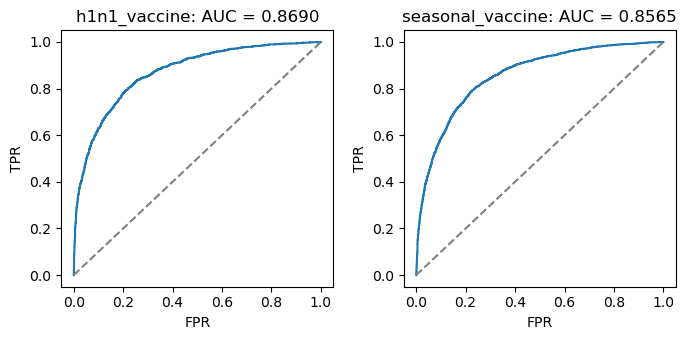

In [12]:
from sklearn.metrics import roc_curve, roc_auc_score
%matplotlib inline
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(7, 3.5))

plot_roc(
    y_eval['h1n1_vaccine'], 
    y_preds['h1n1_vaccine'], 
    'h1n1_vaccine',
    ax=ax[0]
)
plot_roc(
    y_eval['seasonal_vaccine'], 
    y_preds['seasonal_vaccine'], 
    'seasonal_vaccine',
    ax=ax[1]
)
fig.tight_layout()